# Linear regression example with statsmodel
Statsmodel is a realy usefull library for python to get started with linear regression as it gives us very usefull insights. For actual implementation sklearn is prefered as it contains more usefull machine learning algorithms.

Based on https://medium.com/towards-data-science/simple-and-multiple-linear-regression-in-python-c928425168f9 and https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

In [1]:
import pandas as pd

# read data into a DataFrame
data = pd.read_csv('./advertising/Advertising.csv', index_col=0)

In [2]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


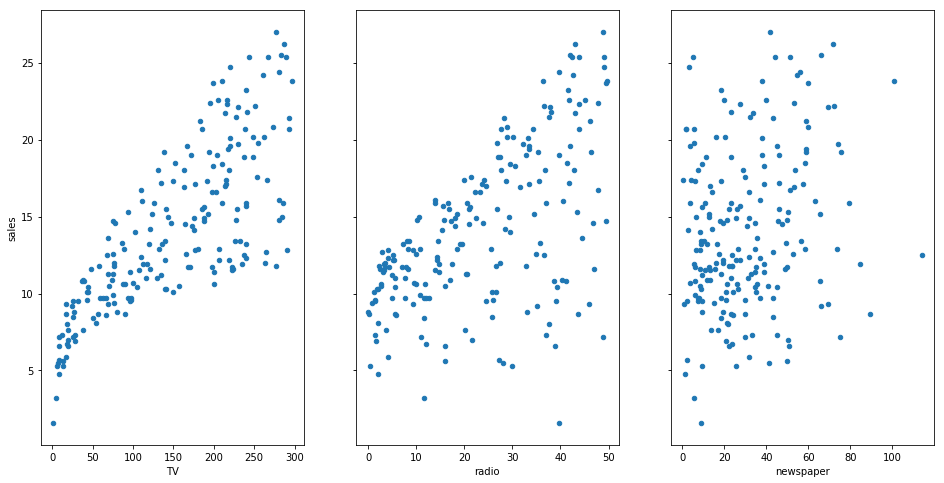

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [4]:
import statsmodels.api as sm

X = data[['TV']]
y = data['sales']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          3.52e-100
Time:                        15:02:36   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          2.43e-171
Time:                        15:02:36   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Example with SKLearn
Here we will do the same as with the first statsmodels example only use TV to allow us to plot it in a 2D graph.

In [6]:
from sklearn import linear_model

X = data[['TV']]
y = data[['sales']]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [10]:
# Create a range for our predictions, base it on the source data but extend it to see the effect
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()*1.5]})
predictions = lm.predict(X_new);

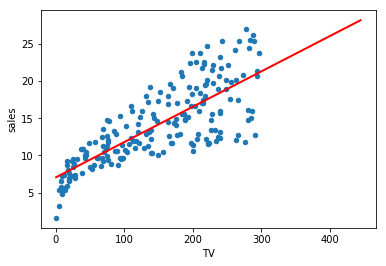

In [9]:
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, predictions, c='red', linewidth=2)